# 3 - Magnets in 3D




__Peter Dunne__

*IPCMS - France*


Now we include the effects of the edges of the magnets
![cuboid](img/cuboid.png)

The magnetic field has three components

\begin{equation}
\mathbf{B} = B_x \hat{x} + B_y \hat{y}+ B_z \hat{z}
\end{equation}



\begin{equation}
B_x = \frac{\mu_0 M_r}{4\pi}\ln{\left[
\frac{F_2\left(-x,y,-z\right)F_2\left(x,y,z\right)}
{F_2\left(x,y,-z\right)F_2\left(-x,y,z\right)}
\right]}
\end{equation}

\begin{equation}
B_y = \frac{\mu_0M_r}{4\pi}\ln{\left[
\frac{F_2\left(-y,x,-z\right)F_2\left(y,x,z\right)}
{F_2\left(y,x,-z\right)F_2\left(-y,x,z\right)}
\right]}
\end{equation}


\begin{align}
B_z = &-\frac{\mu_0 M_r}{4\pi} \Big[ F_1\left(-x,y,z\right)
+ F_1\left(-x,y,-z \right) \nonumber\\
 & + F_1\left(-x,-y,z \right) + F_1\left(-x,-y,-z\right) + F_1\left(x,y,z\right) \nonumber\\
 & + F_1\left(x,y,-z \right) + F_1\left(x,-y,z\right) + F_1\left(x,-y,-z\right) \Big]
\end{align}

Where the functions $F_1$ and $F_2$ are
\begin{equation}
F_1\left(x,y,z\right) = \tan^{-1}{\frac{\left(b+y\right)\left(c+z\right)}
{\left(a+x\right)\sqrt{\left(a+x\right)^2+\left(b+y\right)^2+\left(c+z\right)^2}}}
\end{equation}

\begin{equation}
F_2\left(x,y,z\right) = \frac{\sqrt{\left(a+x\right)^2+\left(b+y\right)^2+\left(c-z\right)^2}+c-z}
{\sqrt{\left(a+x\right)^2+\left(b+y\right)^2+\left(c+z\right)^2}-c-z}
\end{equation}

Don't worry, this is hidden away in the code

## Calculating the Fields

As before, we will import the needed modules

In [4]:
import pymagnet as pm
import numpy as np
import matplotlib.pyplot as plt 

# Plotting backend,
%matplotlib inline
# %matplotlib notebook

# This increases the resolution of plots displayed using the inline backend
%config InlineBackend.figure_format ='retina'

How does a 3D line calculation compared to 2D?

In [7]:
pm.reset_magnets()

width = 10e-3
m_square = pm.magnets.Square(width, centre=(0, -width/2))
m_cube = pm.magnets.Cube(width, centre=(0, 0, -width/2), Jr=1.0, theta=90.0, phi=90)

pm.list_magnets()

Square
J: [0. 1.] (T)
Size: [0.01 0.01] (m)
Center [0. 0.] (m)
Orientation: alpha 0.0

Cube
J: [0. 1. 0.] (T)
Size: [0.01 0.01 0.01] (m)
Center [0. 0. 0.] (m)
Orientation alpha,beta,gamma: [0. 0. 0.]



A cuboid of width 20 mm, breadth 40 mm, depth 60 mm, remnant magnetisation 1.0 T, with no offset to (0, 0, 0).
Magnetised in the $z$ direction (phi = 90.0)

Here we take a slice in the horizontal (x, y) plane across the top of the magnet (z = c):
![cuboid_3D_top_slice](00_tests/cuboid_3D_top_slice.png)



The plot should look similar to this:
![3d_contour_Bn_xy](img/3d_contour_Bn_xy.png)

There can be many different orientations

![cuboid_3D_all_axes](img/cuboid_3D_all_axes.png)

xy


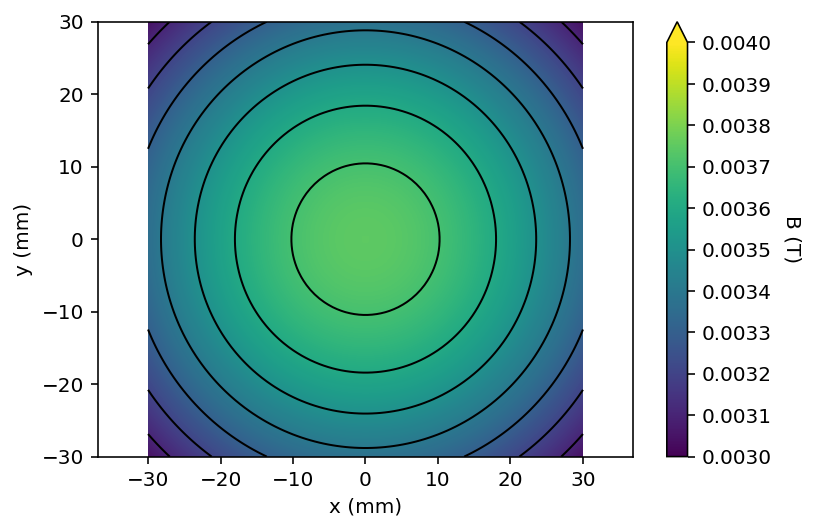

In [11]:
pm.reset_magnets()
width = 20e-3
depth = 40e-3
height = 60e-3

# magnetised in x: 
# theta, phi = 0.0, 90.0

# magnetised in y: 
# theta, phi = 90.0, 90.0

# magnetised in z: 
theta, phi = 90.0, 0.0
# or
# theta, phi= 0.0, 0.0

magnet = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = 1.0,
                          center=(0, 0, 0), theta = theta, phi = phi)

x, y = pm.grid2D(30e-3, 30e-3)
z = height/2 + 100e-3

# x, z = mag.grid2D(40e-3, 40e-3)
# y = 0

# y, z = mag.grid2D(40e-3, 40e-3)
# x = a + 2e-3

B = pm.B_calc_3D(x, y, z)

pm.plots.plot_3D_contour(x, y, z, B, cmin=3e-3, cmax=.004, cmap = 'viridis')

xy


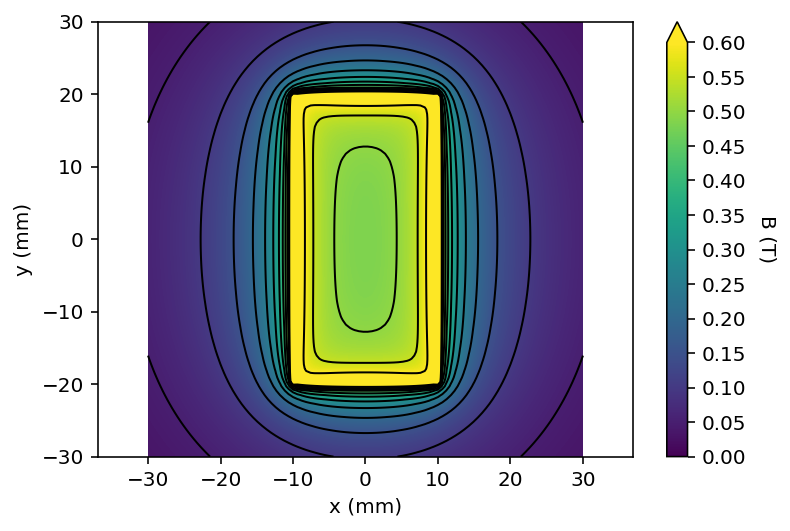

In [15]:
pm.reset_magnets()
width = 20e-3
depth = 40e-3
height = 60e-3

# magnetised in x: 
# theta, phi = 0.0, 90.0

# magnetised in y: 
# theta, phi = 90.0, 90.0

# magnetised in z: 
theta, phi = 90.0, 0.0
# or
# theta, phi= 0.0, 0.0

magnet = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = 1.0,
                          center=(0, 0, 0), theta = theta, phi = phi)

x, y = pm.grid2D(30e-3, 30e-3)
z = height*1.001/2

# x, z = mag.grid2D(40e-3, 40e-3)
# y = 0

# y, z = mag.grid2D(40e-3, 40e-3)
# x = width/2 + 2e-3

B = pm.B_calc_3D(x, y, z)

pm.plots.plot_3D_contour(x, y, z, B, cmin=0, cmax=0.6, num_levels=13, cmap = 'viridis')

## Test Magnet Configurations

- 2 magnets up and down
- 4 magnets in checkerboard pattern (x,y contour)
- 4 magnets in classic quadrupole arrangement 
- 4 magnets in pseudo halbach arrangement


### 2 Magnets up and Down

Recall this plot:
![contour_2_magnets](img/contour_2_magnets.png)

xz


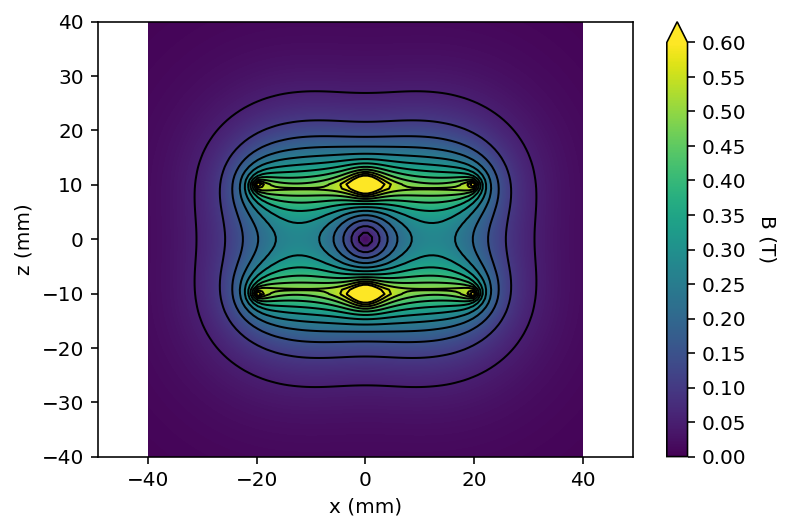

In [19]:
pm.reset_magnets()
width = 20e-3
hGap = width/2
theta, phi = 0.0, 0.0

# Add left magnet
_ = pm.magnets.Cube(width = width, Jr = 1.0, center=(-width/2, 0, 0), theta = theta, phi = phi)

# Add right magnet
_ = pm.magnets.Cube(width = width, Jr = -1.0, center=(width/2, 0, 0), theta = theta, phi = phi)


x, z = pm.grid2D(2*width, 2*width)
# y = width*1.001/2
y = 0

B = pm.B_calc_3D(x, y, z)

cmap = 'viridis'
pm.plots.plot_3D_contour(x, y, z, B, cmax=.6, num_levels=13, cmap = cmap)

### 4 magnets in checkerboard pattern (x,y contour)

Set z = 1e-4 (i,e. 100 µm)
![levitation_arrays](img/levitation_arrays.png)

xy


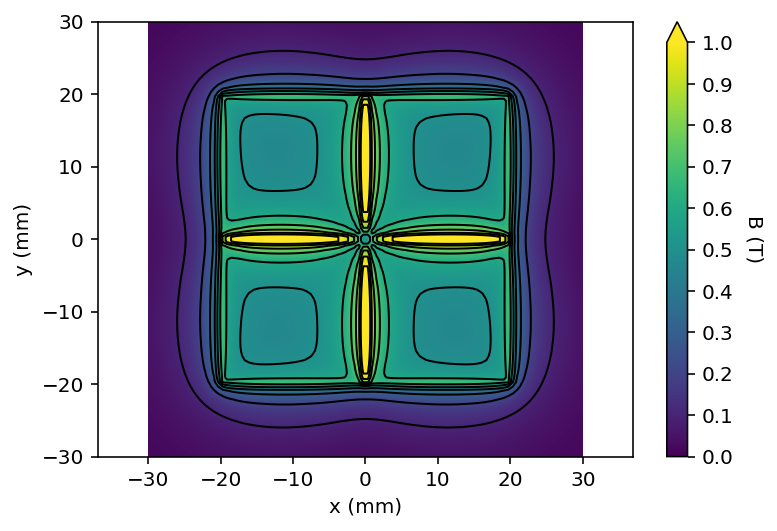

In [22]:
pm.reset_magnets()
width = 20e-3
theta, phi = 0.0, 0.0

_ = pm.magnets.Cube(width = width, Jr = 1.0, center = (-width/2, -width/2, -width/2), theta=theta, phi=phi)
_ = pm.magnets.Cube(width = width, Jr = -1.0, center = (-width/2, width/2, -width/2), theta=theta, phi=phi)
_ = pm.magnets.Cube(width = width, Jr = -1.0, center = (width/2, -width/2, -width/2), theta=theta, phi=phi)
_ = pm.magnets.Cube(width = width, Jr = 1.0, center = (width/2, width/2, -width/2), theta=theta, phi=phi)


x, y = pm.grid2D(1.5*width, 1.5*width)
z = 1e-4

B = pm.B_calc_3D(x, y, z)

cmap = 'viridis'
pm.plots.plot_3D_contour(x, y, z, B, cmax=1.0, num_levels=11, cmap = cmap)

### 4 magnets in classic quadrupole arrangement 
![classic_quad](img/classic_quad.png)

In [ ]:
pm.reset_magnets()
width = 20e-3
theta, phi = 0.0, 0.0

# Magnets here


x, z = pm.grid2D(width/2, width/2)
y = 0

B = pm.B_calc_3D(x, y, z)

cmap = 'viridis'
pm.plots.plot_3D_contour(x, y, z, B, cmax=1.0, num_levels=11, cmap = cmap)

## 4 magnets in pseudo halbach arrangement
![quad_diagram](00_tests/quad_diagram.png)

xz


<AxesSubplot:xlabel='x (mm)', ylabel='z (mm)'>

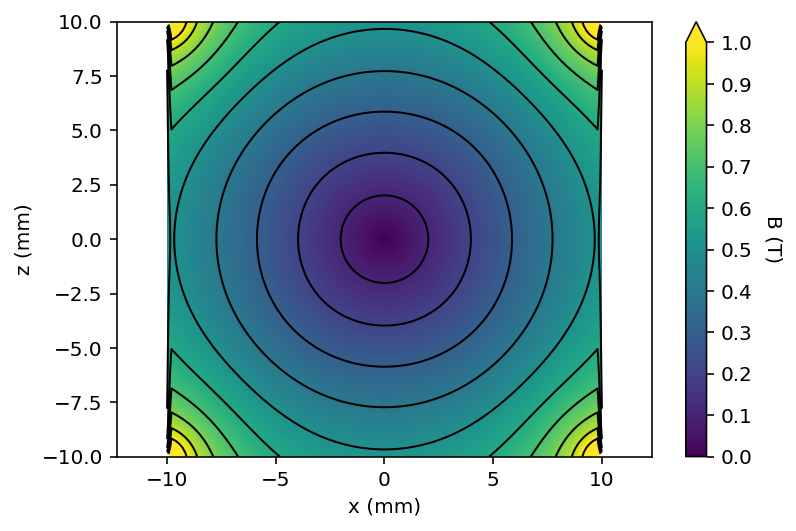

In [31]:
pm.reset_magnets()
width = 20e-3
hGap = width/2
theta, phi = 0.0, 0.0

_ = pm.magnets.Cube(width = width, Jr = 1.0, center = (0, 0, width), theta=0, phi=0)
_ = pm.magnets.Cube(width = width, Jr = -1.0, center = (width, 0, 0), theta=0, phi=90)
_ = pm.magnets.Cube(width = width, Jr = -1.0, center = (0, 0, -width), theta=0, phi=0)
_ = pm.magnets.Cube(width = width, Jr = 1.0, center = (-width, 0, 0), theta=0, phi=90)

                                        
x, z = pm.grid2D(hGap, hGap)
y = 0

B = pm.B_calc_3D(x, y, z)

cmap = 'viridis'
pm.plots.plot_3D_contour(x, y, z, B, cmax=1.0, num_lines=11, cmap = cmap)

## Cylinder Magnets 
Off-axis calculations are not as easy as with prisms/cubes...

Magnetic field due to a cylinder of length $2b$ and radius $a$, with a current $I$ running through $n$ turns of wire

$B_z = \frac{\mu_0 n I}{2} \left[ 
\frac{z + b}{\sqrt{ (z + b)^2 - a^2 }} - 
\frac{z - b}{\sqrt{ (z - b)^2 - a^2 }}  \right]$




For an infinite solenoid, this reduces to:
$B_z = \mu_0 n I$

For the general case, including off-axis points:
    
$B_\rho = B_0 \left[ \alpha_+ C(k_+, 1, 1, -1) 
- \alpha_- C(k_-, 1, 1, -1)
\right] $

and 
$B_z = \frac{B_0 a}{a + \rho} \left[
\beta_+ C(k_+, \gamma^2, 1, \gamma) 
- \beta_- C(k_, \gamma^2, 1, \gamma)
\right]$

where:

$B_0 = \frac{\mu_0}{\pi}n I \,\,\,\,\, z_\pm = z \pm b$

$\alpha_\pm = \frac{a}{\sqrt{z^2_\pm + (\rho + a)^2 }} \,\,\,\,\,\, \beta_\pm = \frac{z_\pm}{\sqrt{z^2_\pm + (\rho + a)^2 }}$

$\gamma = \frac{a - \rho}{a + \rho} \,\,\,\,\,\,\, k_\pm = \sqrt{ \frac{z^2_\pm + (a - \rho)^2}{z^2_\pm + (a + \rho)^2} }$


Relationship between Burlisch's 'cel' function, $C$, and the complete elliptic integrals of the first $K$, second $E$, and third $\Pi$ kind:

$K(k) = C(k_c, 1, 1, 1)$

$E(k) = C(k_c, 1, 1, k_c^2)$

$\Pi(n, k) = C(k_c, n+1, 1, 1) $

where 
$ k = \sqrt{1 - k_c^2}$

A solenoid/cylindrical magnet with an internal magnetic field 1 T
with R = 5 mm, L = 20 mm


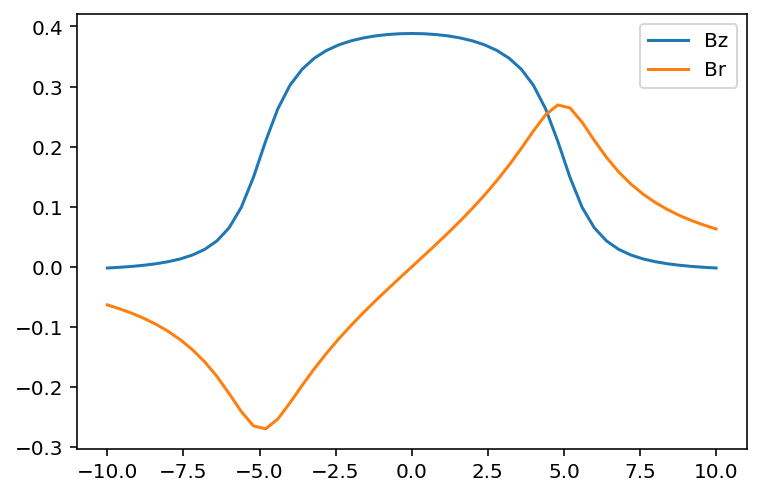

In [32]:
radius = 5e-3
length = 20e-3

m_cyl = pm.magnets.Cylinder(radius = radius, length = length, Jr = 1.0,
                            center=(0.0, 0.0, 0))

pm.plots.line_plot_cylinder(m_cyl)

## Any Questions?

### End of Part 3/3